# <font style = "color:rgb(125, 41, 243)"> **The Iris Dataset - Notebook 3** </font>

You need to install scikit-learn in order to run this notebook:

In [ ]:
#!pip install scikit-learn

## <font style = "color:rgb(125, 41, 243)"> **Machine Learning** </font>

This notebooks uses the discoveries made during EDA, and apply them into creating a machine learing model.

In [1]:
import numpy as np

import pandas as pd
pd.options.plotting.backend = "plotly"

import ipywidgets as widgets

import plotly.express as px
import plotly.figure_factory as ff

In [2]:
import time

from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.model_selection import cross_validate

In [3]:
# to display nice model diagram
from sklearn import set_config

set_config(display = 'diagram')

In [4]:
# Download the dataset from a URL

datasource_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [7]:
# Create a panda data frame object called 'iris_df'. This object holds the contents of our data in tabular format

iris_df = pd.read_csv(datasource_path, 
                      header =  None,
                      )

iris_df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
# This code creates a header row for our data, 

iris_headers = ['Sepal_Length_(cm)', 
                'Sepal_Width_(cm)',
                'Petal_Length_(cm)',
                'Petal_Width_(cm)',
                'Species'
               ]

In [8]:
iris_df.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [11]:
# Add headers to dataframe

iris_df.columns = iris_headers

iris_df

,Sepal_Length_(cm),Sepal_Width_(cm),Petal_Length_(cm),Petal_Width_(cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## <font style = "color:rgb(125, 41, 243)"> **Data Pre-Processing** </font>

The purpose of this step is to pre-process any data, in preparation for use in a machine learning model.

For this use case, the only required pre-processing step is to create a numerical equivalent, to the `Species` feature. Machine learing does not work with catergorical fields.

### <font style = "color:rgb(125, 41, 243)"> **Categorical to Numerical** </font>

### <font style = "color:rgb(125, 41, 243)"> **Identification of Target Class** </font>

The purpose of this step is to prepare a list of the `Target Class`. The machine learning models need information in this fashion.

In [12]:
# Identifying the target class

target_name = "Species"

In [13]:
target = iris_df[target_name]

target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

### <font style = "color:rgb(125, 41, 243)"> **Data Preparation** </font>

This step prepares the data so it can be used in a machine learning model.

In [14]:
# 2-Feature dataset
# Sepal width will be dropped from this list, given our EDA determining this feature is not significant.

data_2features = iris_df[['Petal_Length_(cm)', 'Petal_Width_(cm)']]

data_2features

,Petal_Length_(cm),Petal_Width_(cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [15]:
# 3-Feature dataset
# Sepal width will be dropped from this list, given our EDA determining this feature is not significant.

data_3features = iris_df[['Petal_Length_(cm)', 'Petal_Width_(cm)', 'Sepal_Length_(cm)']]
                                
data_3features

,Petal_Length_(cm),Petal_Width_(cm),Sepal_Length_(cm)
0,1.4,0.2,5.1
1,1.4,0.2,4.9
2,1.3,0.2,4.7
3,1.5,0.2,4.6
4,1.4,0.2,5.0
...,...,...,...
145,5.2,2.3,6.7
146,5.0,1.9,6.3
147,5.2,2.0,6.5
148,5.4,2.3,6.2


## <font style = "color:rgb(125, 41, 243)"> **Building Machine Learing Models** </font>

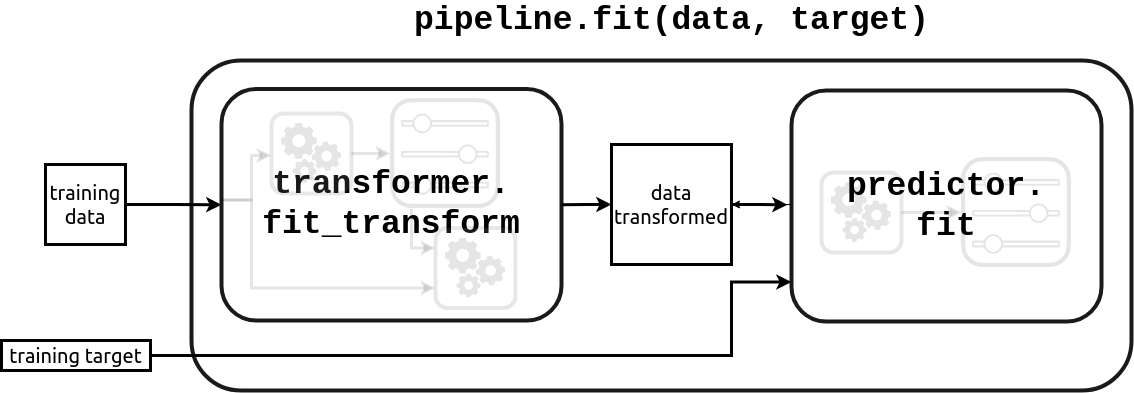

### <font style = "color:rgb(125, 41, 243)"> **Building Machine Learning Models and Pipelines** </font>

In [16]:
logistic_regression_model = make_pipeline(StandardScaler(), 
                                          LogisticRegression(),
                                         )

logistic_regression_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [21]:
sgdc_model = make_pipeline(StandardScaler(), 
                           SGDClassifier(),
                          )

sgdc_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [17]:
svc_model = make_pipeline(StandardScaler(), 
                          SVC(),
                         )

svc_model

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [18]:
knn_model = make_pipeline(StandardScaler(), 
                          KNeighborsClassifier(),
                         )

knn_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [19]:
tree_model = make_pipeline(StandardScaler(), 
                           DecisionTreeClassifier(),
                          )

tree_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [20]:
histboost_model = make_pipeline(StandardScaler(), 
                                HistGradientBoostingClassifier(),
                                )

histboost_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('histgradientboostingclassifier',
                 HistGradientBoostingClassifier())])

### <font style = "color:rgb(125, 41, 243)"> **Split Training \& Test Data** </font>

#### <font style = "color:rgb(125, 41, 243)"> **2-Feature split** </font>

In [22]:
data_train2f, data_test2f, target_train2f, target_test2f = train_test_split(data_2features, 
                                                                            target,
                                                                            train_size = 0.80
                                                                            )

#### <font style = "color:rgb(125, 41, 243)"> **3-Feature split** </font>

In [23]:
data_train3f, data_test3f, target_train3f, target_test3f = train_test_split(data_3features, 
                                                                            target,
                                                                            train_size = 0.80
                                                                            )

### <font style = "color:rgb(125, 41, 243)"> **2-Feature Model fitting** </font>

#### <font style = "color:rgb(125, 41, 243)"> **Logistic Regression** </font>

In [24]:
# Logistic Regression Model fitting with training data 

%time

logistic_regression_model.fit(data_train2f, target_train2f)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

#### <font style = "color:rgb(125, 41, 243)"> **SGDClasifier** </font>

In [25]:
# SGDClasifier Model fitting with training data

%time

sgdc_model.fit(data_train2f, target_train2f)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.39 µs


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

#### <font style = "color:rgb(125, 41, 243)"> **SVClasifier** </font>

In [26]:
# SVClasifier Model fitting with training data

%time

svc_model.fit(data_train2f, target_train2f)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 9.06 µs


Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

#### <font style = "color:rgb(125, 41, 243)"> **KNearestNeighbors** </font>

In [27]:
# KNearestNeighbors Model fitting with training data

%time

knn_model.fit(data_train2f, target_train2f)

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 13.6 µs


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

#### <font style = "color:rgb(125, 41, 243)"> **Decision tree** </font>

In [28]:
# Decision tree Model fitting with training data

%time

tree_model.fit(data_train2f, target_train2f)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

#### <font style = "color:rgb(125, 41, 243)"> **Histgrade Boost** </font>

In [29]:
# Histgrade Boost Model fitting with training data

%time

histboost_model.fit(data_train2f, target_train2f)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('histgradientboostingclassifier',
                 HistGradientBoostingClassifier())])

### <font style = "color:rgb(125, 41, 243)"> **2-Feature Model Predictions** </font>

In [30]:
lr_predict = logistic_regression_model.predict(data_test2f)

In [31]:
sgd_predict = sgdc_model.predict(data_test2f)

In [32]:
svc_predict = svc_model.predict(data_test2f)

In [33]:
knn_predict = knn_model.predict(data_test2f)

In [34]:
tree_predict = tree_model.predict(data_test2f)

In [35]:
histboost_predict = histboost_model.predict(data_test2f)

In [39]:
model_results_df = pd.DataFrame({'Target': target_test2f,
                                 'Logistic Regression': lr_predict,
                                 'SGDClassifier': sgd_predict,
                                 'SVClassifier': svc_predict,
                                 'KNNClassifier': knn_predict,
                                 'Decision Tree': tree_predict,
                                 'Hist Grad Boosting': histboost_predict,
                                }
                               )
model_results_df                

,Target,Logistic Regression,SGDClassifier,SVClassifier,KNNClassifier,Decision Tree,Hist Grad Boosting
15,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
140,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
117,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
134,Iris-virginica,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-virginica,Iris-versicolor
137,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
149,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
29,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
119,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
39,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa


In [40]:
pd.options.plotting.backend = "plotly"

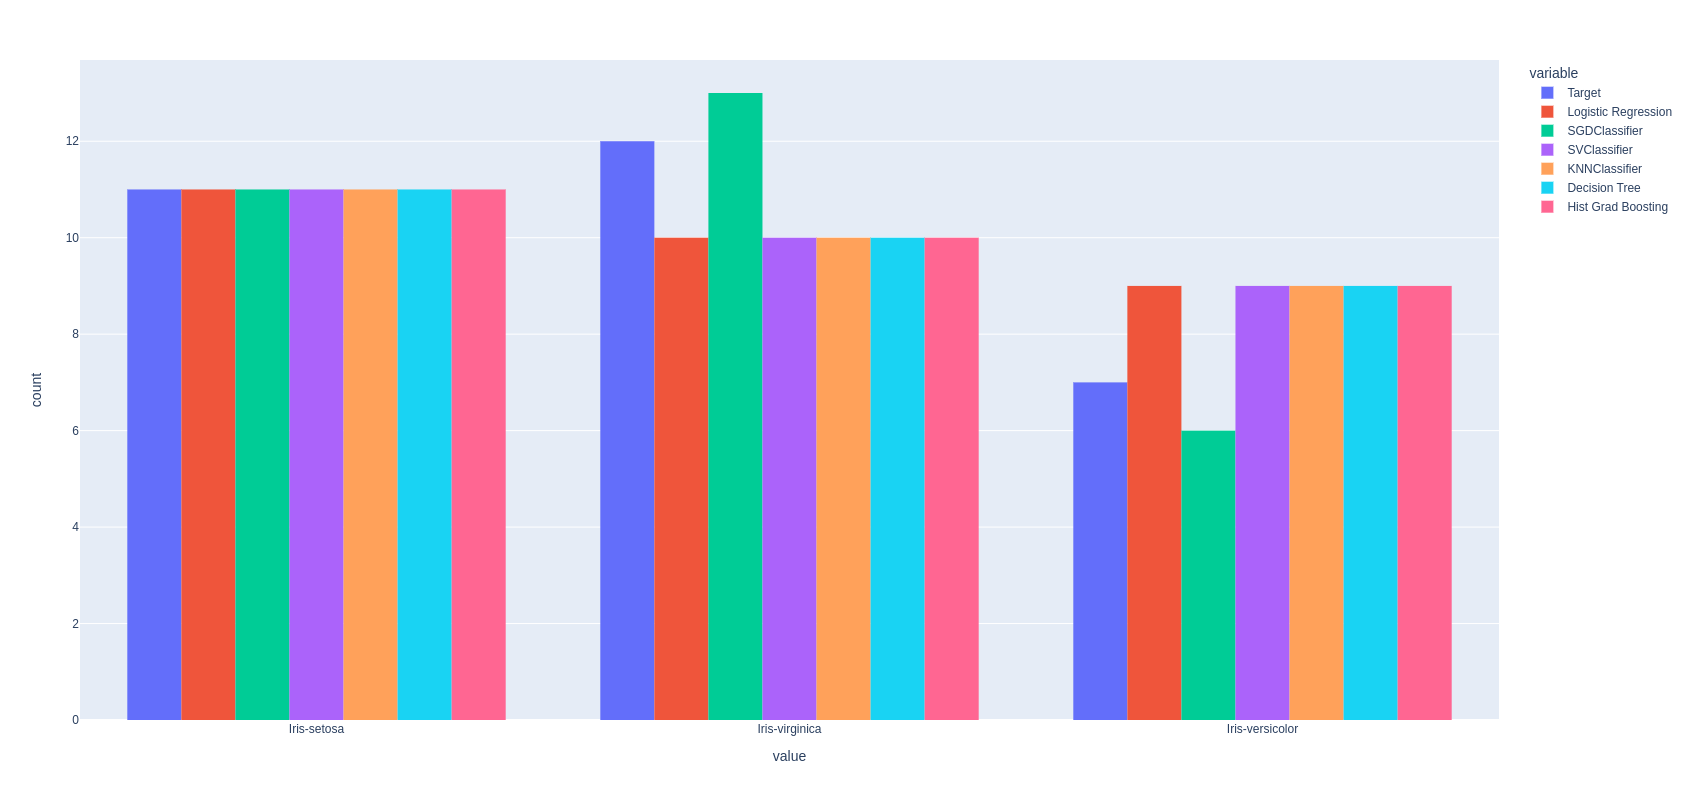

In [65]:
model_results_df.plot(kind = 'hist',
                      barmode = 'group',
                      height = 800
                     )

### <font style = "color:rgb(125, 41, 243)"> **2-Feature Model Accuracy Checking** </font>

The purpose of this step is to look for `Overfitting` or `Underfitting` according to these definitions:

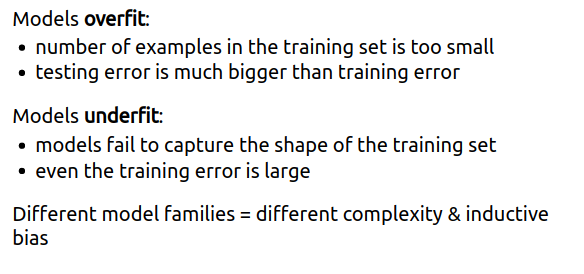

#### <font style = "color:rgb(125, 41, 243)"> **Logistic Regression** </font>

In [43]:
# Logistic Regression
lr_score = logistic_regression_model.score(data_test2f, target_test2f)

print(f"The accuracy using a logistic regression model is {lr_score:.3f} "
       f"in {logistic_regression_model[-1].n_iter_[0]} iterations")

The accuracy using a logistic regression model is 0.933 in 16 iterations


#### <font style = "color:rgb(125, 41, 243)"> **SGDClasifier** </font>

In [44]:
# SGDClasifier
sgdc_score = sgdc_model.score(data_test2f, target_test2f)

print(f"The accuracy using a sgdc model is {sgdc_score:.3f} ")

The accuracy using a sgdc model is 0.900 


#### <font style = "color:rgb(125, 41, 243)"> **SVClasifier** </font>

In [45]:
# SVClasifier 
svc_score = svc_model.score(data_test2f, target_test2f)

print(f"The accuracy using a svc model is {svc_score:.3f} ")

The accuracy using a svc model is 0.933 


#### <font style = "color:rgb(125, 41, 243)"> **KNearestNeighbors** </font>

In [46]:
# KNN Clasifier
knn_score = knn_model.score(data_test2f, target_test2f)

print(f"The accuracy using a k-nearest neighbor model is {knn_score:.3f} ")

The accuracy using a k-nearest neighbor model is 0.933 


#### <font style = "color:rgb(125, 41, 243)"> **Decision tree** </font>

In [47]:
# Decision Tree
tree_score = tree_model.score(data_test2f, target_test2f)

print(f"The accuracy using a decision tree model is {tree_score:.3f} ")

The accuracy using a decision tree model is 0.933 


#### <font style = "color:rgb(125, 41, 243)"> **Histgrade Boost** </font>

In [48]:
# Histgrade Boost
histboost_score = histboost_model.score(data_test2f, target_test2f)

print(f"The accuracy using a decision tree model is {histboost_score:.3f} ")

The accuracy using a decision tree model is 0.933 


### <font style = "color:rgb(125, 41, 243)"> **2-Feature Cross Validation** </font>

The purpose of cross validation is to check the general performance of your model. 

The following graphic, and description, comes from [this website](https://inria.github.io/scikit-learn-mooc/python_scripts/02_numerical_pipeline_scaling.html): 

Cross-validation consists of repeating the procedure such that the training and testing sets are different each time. Generalization performance metrics are collected for each repetition and then aggregated. As a result we can get an estimate of the variability of the model’s generalization performance.

Note that there exists several cross-validation strategies, each of them defines how to repeat the fit/score procedure. In this section, we will use the K-fold strategy: the entire dataset is split into K partitions. The `fit/score` procedure is repeated `K` times where at each iteration `K - 1` partitions are used to fit the model and `1` partition is used to score. The figure below illustrates this K-fold strategy.

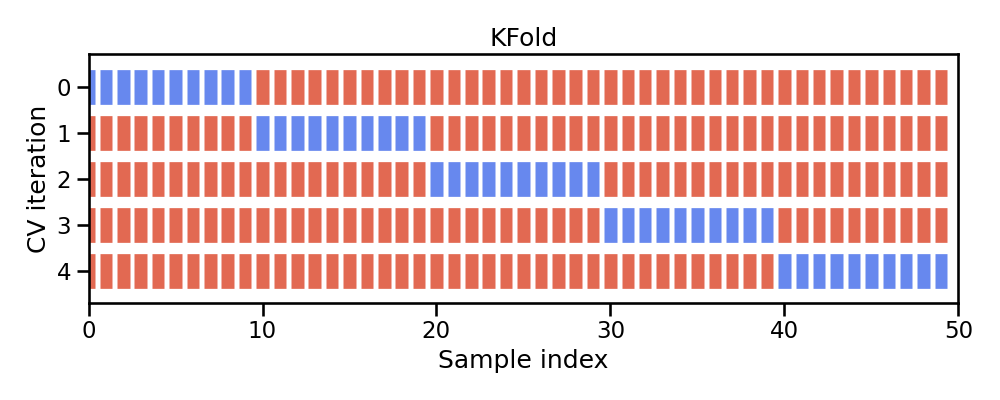

The following graph comes from [this website](https://scikit-learn.org/stable/modules/cross_validation.html): 

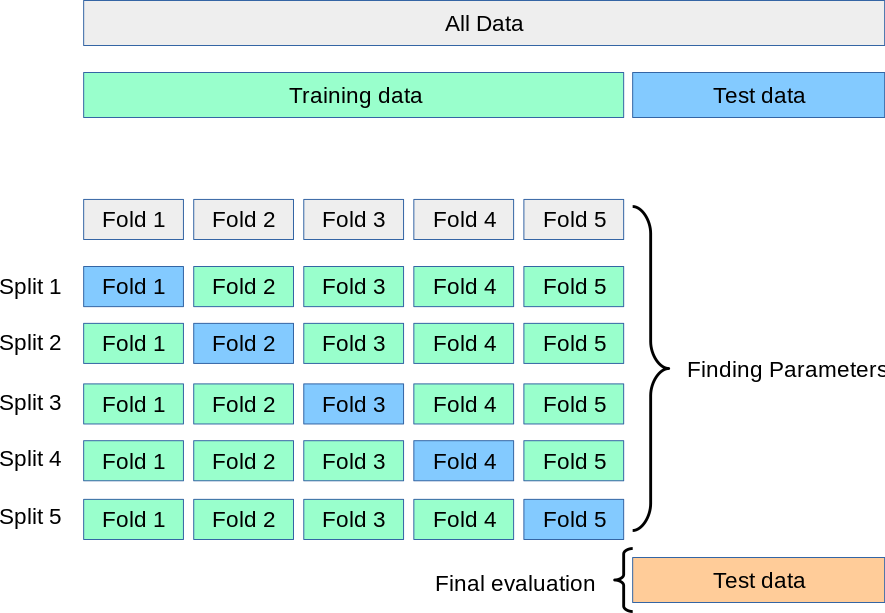

#### <font style = "color:rgb(125, 41, 243)"> **Logistic Regression Cross Validation** </font>

In [49]:
# Logistic Regression Cross-Validation
cv_result_lr = cross_validate(logistic_regression_model,
                              data_2features, 
                              target, 
                              cv = 5
                             )

cv_result_lr

{'fit_time': array([0.00977778, 0.00915742, 0.01260805, 0.00751448, 0.0080564 ]),
 'score_time': array([0.00132966, 0.00155592, 0.0013485 , 0.00134802, 0.00150061]),
 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])}

In [50]:
# Logistic Regression results
cv_scores_lr = cv_result_lr["test_score"]
print("The mean cross-validation accuracy is: "
      f"{cv_scores_lr.mean():.3f} +/- {cv_scores_lr.std():.3f}")

The mean cross-validation accuracy is: 0.960 +/- 0.025


In [51]:
cv_result_lr["test_error"] = -cv_result_lr["test_score"]

cv_result_lr

{'fit_time': array([0.00977778, 0.00915742, 0.01260805, 0.00751448, 0.0080564 ]),
 'score_time': array([0.00132966, 0.00155592, 0.0013485 , 0.00134802, 0.00150061]),
 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ]),
 'test_error': array([-0.96666667, -0.96666667, -0.93333333, -0.93333333, -1.        ])}

In [52]:
lr_bins = widgets.IntSlider(value = None,
                            min = 0,
                            max = 50,
                            step = 1,
                            description = 'bins',
                            disabled = False,
                            continuous_update = False,
                            orientation = 'horizontal',
                            readout = True,
                            readout_format = 'd'
                           )

In [53]:
features_lr = cv_result_lr.keys()

features_lr

dict_keys(['fit_time', 'score_time', 'test_score', 'test_error'])

In [54]:
@widgets.interact
def cv_lr(bins = lr_bins, x_feature = features_lr):
    fig = px.histogram(cv_result_lr, 
                       x = x_feature,
                       histfunc = None, # None, 'count', 'sum', 'avg', 'min', 'max'
                       histnorm = 'percent', # None, 'percent', 'probability', 'density', 'probability density'
                       nbins = bins,
                       height = 400,
                       width = 500,
                       )

    fig.show()

interactive(children=(IntSlider(value=0, continuous_update=False, description='bins', max=50), Dropdown(descri…

#### <font style = "color:rgb(125, 41, 243)"> **SGDClasifier Cross Validation** </font>

In [55]:
# SGDClasifier Cross-Validation
cv_result_sgdc = cross_validate(sgdc_model,
                                data_2features, 
                                target, 
                                cv = 5
                                )

cv_result_sgdc

{'fit_time': array([0.00583267, 0.00916767, 0.00500441, 0.00529814, 0.00420833]),
 'score_time': array([0.00179648, 0.00140262, 0.00122428, 0.0012629 , 0.00135279]),
 'test_score': array([0.93333333, 0.96666667, 0.9       , 0.9       , 0.96666667])}

In [56]:
# SGDClasifier Cross-Validation reults
cv_scores_sgdc = cv_result_sgdc["test_score"]
print("The mean cross-validation accuracy is: "
      f"{cv_scores_sgdc.mean():.3f} +/- {cv_scores_sgdc.std():.3f}")

The mean cross-validation accuracy is: 0.933 +/- 0.030


#### <font style = "color:rgb(125, 41, 243)"> **SVClasifier Cross Validation** </font>

In [57]:
# SVClasifier Cross-Validation
cv_result_svc = cross_validate(svc_model,
                               data_2features, 
                               target, 
                               cv = 5
                              )

cv_result_svc

{'fit_time': array([0.00403237, 0.00328302, 0.00318527, 0.00700974, 0.00404096]),
 'score_time': array([0.0017097 , 0.00125098, 0.00134802, 0.00323629, 0.00123811]),
 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])}

In [58]:
# SVClasifier Cross-Validation reults
cv_scores_svc = cv_result_svc["test_score"]
print("The mean cross-validation accuracy is: "
      f"{cv_scores_svc.mean():.3f} +/- {cv_scores_svc.std():.3f}")

The mean cross-validation accuracy is: 0.960 +/- 0.025


#### <font style = "color:rgb(125, 41, 243)"> **KNearestNeighbors Cross Validation** </font>

In [59]:
# KNN Clasifier Cross-Validation
cv_result_knn = cross_validate(knn_model,
                               data_2features, 
                               target, 
                               cv = 5
                              )

cv_result_knn

{'fit_time': array([0.00481963, 0.00435305, 0.0038085 , 0.0029285 , 0.00332069]),
 'score_time': array([0.00412083, 0.00299215, 0.00308585, 0.00258732, 0.0029757 ]),
 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])}

In [60]:
# KNN Clasifier Cross-Validation reults
cv_scores_knn = cv_result_knn["test_score"]
print("The mean cross-validation accuracy is: "
      f"{cv_scores_knn.mean():.3f} +/- {cv_scores_knn.std():.3f}")

The mean cross-validation accuracy is: 0.960 +/- 0.025


#### <font style = "color:rgb(125, 41, 243)"> **Decision Tree Cross Validation** </font>

In [61]:
# Decision Tree Clasifier Cross-Validation
cv_result_tree = cross_validate(tree_model,
                                data_2features, 
                                target, 
                                cv = 5
                               )

cv_result_tree

{'fit_time': array([0.00670743, 0.0048461 , 0.00347996, 0.00307751, 0.0065546 ]),
 'score_time': array([0.00235748, 0.00147724, 0.00120187, 0.00153661, 0.00122428]),
 'test_score': array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])}

In [62]:
# Decision Tree Clasifier Cross-Validation reults
cv_scores_tree = cv_result_tree["test_score"]
print("The mean cross-validation accuracy is: "
      f"{cv_scores_tree.mean():.3f} +/- {cv_scores_tree.std():.3f}")

The mean cross-validation accuracy is: 0.960 +/- 0.033


#### <font style = "color:rgb(125, 41, 243)"> **Histgrade Boost Cross Validation** </font>

In [63]:
# Decision Tree Clasifier Cross-Validation
cv_result_histboost = cross_validate(histboost_model,
                                     data_2features, 
                                     target, 
                                     cv = 5
                                     )

cv_result_histboost

{'fit_time': array([0.53688216, 0.22959232, 0.27088594, 0.24963427, 0.28575158]),
 'score_time': array([0.01657557, 0.00814009, 0.00864673, 0.00823569, 0.00673509]),
 'test_score': array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])}

In [64]:
# Decision Tree Clasifier Cross-Validation reults
cv_scores_histboost = cv_result_histboost["test_score"]
print("The mean cross-validation accuracy is: "
      f"{cv_scores_histboost.mean():.3f} +/- {cv_scores_histboost.std():.3f}")

The mean cross-validation accuracy is: 0.960 +/- 0.033


In [ ]:
result = nn_model.score(data_test2f, target_test2f)

In [ ]:
nn_model.score

In [ ]:

print(f"The accuracy using a logistic regression model is {sgdc_score:.3f} "
       f"in {sgdc_model[-1].n_iter_[0]} iterations")

In [ ]:
lr_model_name = type(logistic_regression_model).__name__

lr_model_name

In [ ]:
lr_model_name = logistic_regression_model.__class__.__name__

lr_model_name

In [ ]:
lr_score = logistic_regression_model.score(data_test2f, target_test2f)

In [ ]:
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model[-1].n_iter_[0]} iterations")

In [ ]:
score = model.score(data_test, target_test)

In [ ]:
model.named_steps

In [ ]:
start = time.time()

# Train the model
model.fit(data_train, target_train)

elapsed_time = time.time() - start

In [ ]:
predicted_target = model.predict(data_test)

predicted_target[:5]

In [ ]:
# Run the model with scaled features
model_name = model.__class__.__name__

model_name

In [ ]:
target = iris_df[target_name]

target

### <font style = "color:rgb(125, 41, 243)"> **Checking Accuracy** </font>

In [ ]:
score = model.score(data_test, target_test)

In [ ]:
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model[-1].n_iter_[0]} iterations")

### <font style = "color:rgb(125, 41, 243)"> **Cross-Validation Check** </font>

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
model = make_pipeline(StandardScaler(), LogisticRegression())

model

In [ ]:
%%time

cv_result = cross_validate(model, data_2features, target, cv = 5)

cv_result

In [ ]:
scores = cv_result["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

### <font style = "color:rgb(125, 41, 243)"> **Training and Testing a 3-Features Machine Learing Pipeline** </font>

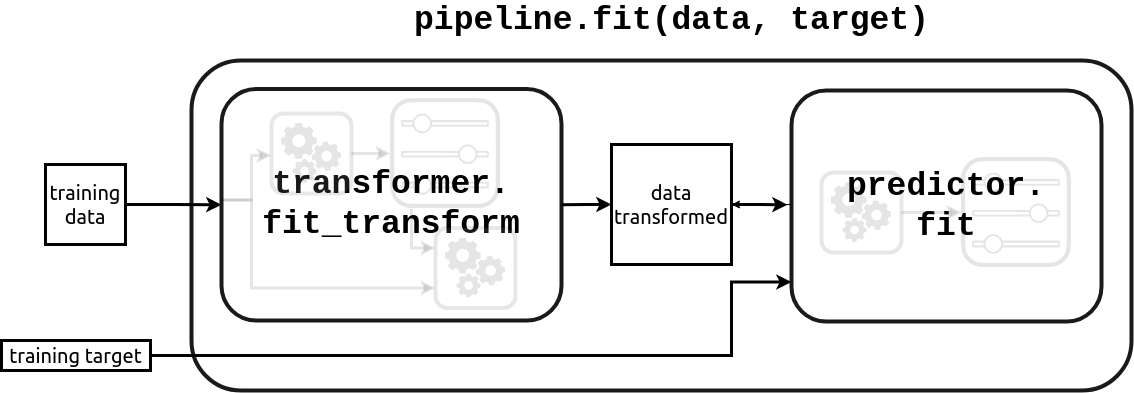

#### <font style = "color:rgb(125, 41, 243)"> **Split Training \& Test Data** </font>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_train3f, data_test3f, target_train3f, target_test3f = train_test_split(data_3features, 
                                                                    target,
                                                                    train_size = 0.80
                                                                   )

These steps are how you build a classifier ML model.

In [ ]:
import time

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

In [ ]:
model = make_pipeline(StandardScaler(), 
                      LogisticRegression()
                     )

model

In [ ]:
model.named_steps

In [ ]:
start = time.time()

# Train the model
model.fit(data_train, target_train)

elapsed_time = time.time() - start

In [ ]:
predicted_target = model.predict(data_test)

predicted_target[:5]

In [ ]:
# Run the model with scaled features
model_name = model.__class__.__name__

model_name

### <font style = "color:rgb(125, 41, 243)"> **Checking Accuracy** </font>

In [ ]:
score = model.score(data_test, target_test)

In [ ]:
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model[-1].n_iter_[0]} iterations")

### <font style = "color:rgb(125, 41, 243)"> **Cross-Validation Check** </font>

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
model = make_pipeline(StandardScaler(), LogisticRegression())

model

In [ ]:
%%time

cv_result = cross_validate(model, data_2features, target, cv = 5)

cv_result

In [ ]:
scores = cv_result["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

### <font style = "color:rgb(125, 41, 243)"> **Visualizing the results** </font>

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
h = .02  # step size in the mesh

In [ ]:
names = ["Nearest Neighbors", 
         "Linear SVM", 
         "RBF SVM", 
         "Gaussian Process",
         "Decision Tree", 
         "Random Forest", 
         "Neural Net", 
         "AdaBoost",
         "Naive Bayes",
         "QDA"
        ]

In [ ]:
classifiers = [KNeighborsClassifier(3),
               SVC(kernel = "linear", C = 0.025),
               SVC(gamma = 2, C = 1),
               GaussianProcessClassifier(1.0 * RBF(1.0)),
               DecisionTreeClassifier(max_depth = 5),
               RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1),
               MLPClassifier(alpha = 1, max_iter =1000),
               AdaBoostClassifier(),
               GaussianNB(),
               QuadraticDiscriminantAnalysis()
              ]

In [ ]:
figure = plt.figure(figsize=(27, 9))

In [ ]:
i = 1

In [ ]:
X = StandardScaler().fit_transform(data_2features)

In [ ]:
y = target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = .4, 
                                                    random_state = 42
                                                   )

In [ ]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5

In [ ]:
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

In [ ]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h)
                    )

In [ ]:
# just plot the dataset first

cm = plt.cm.RdBu

In [ ]:
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [ ]:
ax = plt.subplot(len(data_2features), len(classifiers) + 1, i)